Módulos

In [1]:
import numpy as np #Módulo para hacer operaciones matematicas con matrices.
from scipy import signal # Módulo LTI. 
from scipy import integrate # resolver ecuaciones diferenciales
import matplotlib # graficar

Variables globales

In [2]:
Tsim=2000
f0=0.2
h0=(f0/0.1)**2
R=1
Hmax=10
K=np.pi*R**2/Hmax**2

Función estanque de área constante y de flujo de entrada.

In [19]:
def flujo(t):
  return f0-0.3*f0*np.heaviside(t-500,1)+0.7*f0*np.heaviside(t-1000,1)
def dh(t,x):
  if x<=0:
    return 0.0001
  else:
    dx=flujo(t)/K/(x**2)-0.1/K/(x**1.5);
    return [dx]

Solución de ecuación diferencial

In [20]:
print(flujo(1000))

0.28


In [21]:
out=integrate.solve_ivp(dh,(0,Tsim),[h0],dense_output=True)

In [22]:
print(out.sol)

In [23]:
print(out.sol.__call__(5000)[0])


-6.759251196449147


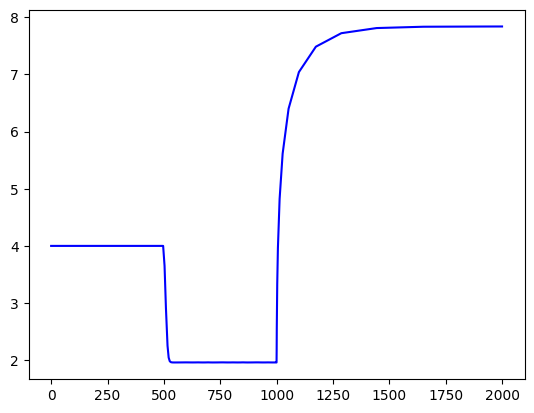

In [24]:
matplotlib.pyplot.plot(out.t,out.y[0,:],'b')

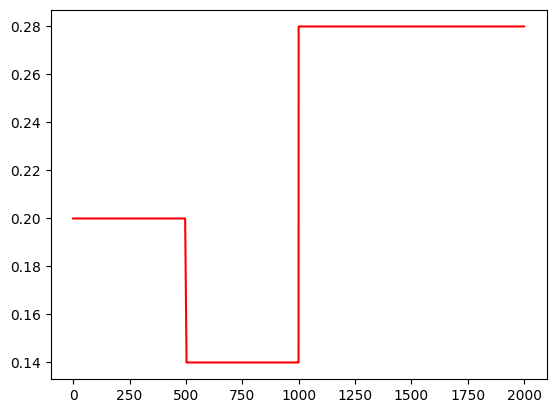

In [25]:
matplotlib.pyplot.plot(out.t,flujo(out.t),'r')

Creación de sistema linealizado

In [26]:
A=np.array([[-2*f0/(K*h0**3)+3*0.1/(2*K*h0**(5.0/2.0))]])
B=np.array([[1/(K*h0**2.)]])
C=np.array([[1]])
D=np.array([[0]])
sys=signal.lti(A,B,C,D)

Simulación de sistema linealizado

In [27]:
t=np.linspace(0,Tsim,num=2000)
tout, yout, xout=signal.lsim(sys,flujo(t)-f0,t)

Gráfica de sistema linealizado

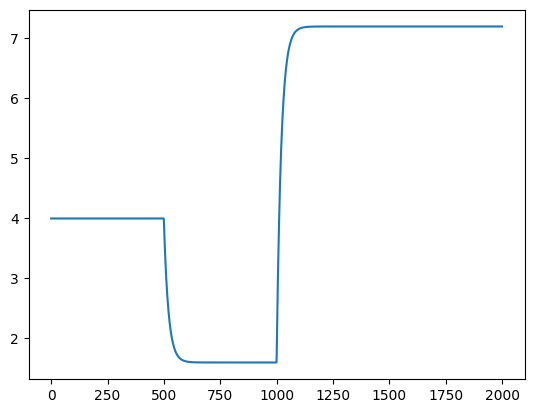

In [28]:
matplotlib.pyplot.plot(tout,yout+h0)

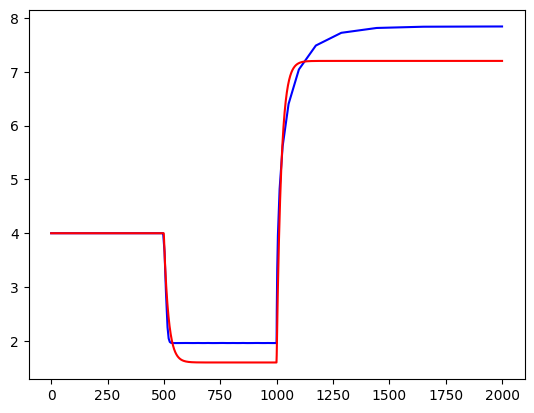

In [29]:
matplotlib.pyplot.plot(out.t,out.y[0,:],'b',tout,yout+h0,'r')
